# Random forest predictions

In [284]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

import matplotlib.pylab as plt
plt.style.use('ggplot')

In [285]:
metaData_apartment = pd.read_json('../data/apartments_meta.json')
metaData_building = pd.read_json('../data/buildings_meta.json')
metaData_apartment.at[0, 'name'] = 'apartment_id'
metaData_building.at[0, 'name'] = 'building_id'
metaData = pd.concat([metaData_apartment, metaData_building])
train_apartment = pd.read_csv('../data/apartments_train.csv')
train_building = pd.read_csv('../data/buildings_train.csv')
train = pd.merge(train_apartment, train_building, left_on='building_id', right_on='id')
train.rename(columns={'id_x' : 'apartment_id'}, inplace=True)
train.drop('id_y', axis=1, inplace=True)
train = train.fillna(train.mean())

In [310]:
features = ['area_total', 'area_living', 'ceiling', 'constructed', 'stories', 'bathrooms_shared']
train = train[(np.abs(stats.zscore(train['price'])) < 4)]
X, y = train[features], train['price']
X = X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [311]:
# test_apartment = pd.read_csv('../data/apartments_test.csv')
# test_building = pd.read_csv('../data/buildings_test.csv')
# test = pd.merge(test_apartment, test_building, left_on='building_id', right_on='id')
# test.rename(columns={'id_x' : 'apartment_id'}, inplace=True)
# test.drop('id_y', axis=1, inplace=True)
# test = test.fillna(test.mean())

In [312]:
model2 = RandomForestRegressor(
    n_estimators=500,
    criterion='mse',
    max_depth=10,
#     min_samples_split=2,
#     min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=2,
    verbose=0,
    warm_start=True,
    ccp_alpha=0.0,
    max_samples=None
)

In [313]:
model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=500,
                      random_state=2, warm_start=True)

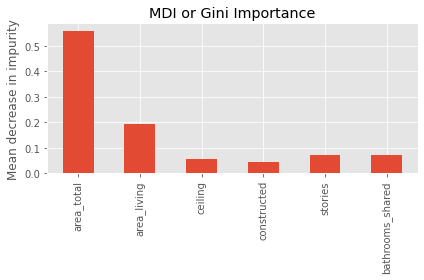

In [314]:
importances = model2.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("MDI or Gini Importance")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [315]:
rf_prediction = model2.predict(X_test)

In [316]:
rf_mse = round(mean_squared_error(rf_prediction, y_test), 2)
print('Test MSE:', rf_mse/10000000000000)

Test MSE: 5.167805519351927


Text(0, 0.5, 'Ground Truth')

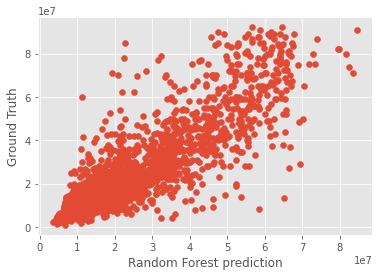

In [317]:
plt.scatter(rf_prediction, y_test)
plt.xlabel('Random Forest prediction')
plt.ylabel('Ground Truth')